# Integrator

## Euler method

- is a first-order numerical procedure for solving ordinary differential equations (ODEs) with a given initial value
- approximating the integral with the finite sum 
- by the Taylor expansion, the quadratic and higher-order terms are ignored

Approximation 
$$ x(t+\tau)=x(t)+\tau\, v(t)\\
v(t+\tau)=v(t)+\tau\, a(t)=v(t)-\frac{\tau}{m}\,\nabla\phi(x(t)) \\
\text{with}\,\, v= \frac{\partial x}{\partial t}; \,\, \text{and}\,\, a=\frac{F}{m}=-\frac{1}{m}\nabla \phi(x(t))$$

### Goals
- timing
- testing
    - functionality
- visualisation
    - timing
    - stability

### setup of the algorithm
- import packages
- define function with its inputs
    - (function): potential gradient 
    - (parameter): mass
    - (functionality): size (number of time steps), time step, initial configuration, initial velocity
- creating positiion and velocity container 
- initialization by adding the start configuration
- time iteration 
    - euler approximation
    - pbc
    - write in pos and vel container
- returning position and velocety container


- choice between open and closed system in potential
- pbc defined in algoritm 
- pbc and closed system condition do not work together 

In [1]:
%matplotlib notebook
import numpy as np
import timeit
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

### potential
- defining forces
- defining system
    - open system
    - closed system

In [ ]:
def potential_gradient(p, k=10):
    return k*p

In [2]:
def potential_gradient(p, box, k=1):
    p_max, p_min = box[0], box[1]
    V_r = (p - (p_max - p_max/4))*(p>=p_max)
    V_l = (p - (p_min - p_min/4))*(p<=p_min)
    V = V_r+ V_l 
    return V  

### algorithm


In [3]:
def eulerclose(potential_gradient, position_init, velocity_init, mass, T, time_step, box):
 """
    This function realise the Euler integration scheme. This scheme approximating the 
    integral with the finite sum by the Taylor expansion, whereby the quadratic and 
    higher-order terms are ignored.
    
    Arguments:
        potential_gradient (function): computes potential gradient for particle-positions,
                                       choose between open and closed system
        position_init (numpy.ndarray(n, dim)): initial configuration in dim dimensions
        velocity_init (numpy.ndarray(n, dim)): initial velocity in dim dimensions
        mass (numpy.ndarray(n)): mass of each particle
        T (int): total time of integration
        time_step (float): step size for integration 
        box (double): first right maximum value, second left minimum value

        
    Returns:
        position_matrix (numpy.ndarray(size, n, dim)): configuraiton trajectory
        velocity_matrix (numpy.ndarray(size, n, dim)): velocity trajectory
        acceleration_matrix (numpy.ndarray(size, n, dim)): acceleration trajectory
       
    """
    size = int(T/time_step)  
    n = len(position_init)   
    dim = position_init.shape[-1]
    m = mass
    position_matrix, velocity_matrix, acceleration_matrix = np.zeros((size, n, dim)), np.zeros((size, n, dim)), np.zeros((size, n, dim))
    position_matrix[0], velocity_matrix[0], acceleration_matrix[0] = position_init, velocity_init, - 1/m *potential_gradient(position_init, box)
    for t in range(1, size):
        p = position_matrix[t-1]
        v = velocity_matrix[t-1]
        a = acceleration_matrix[t]
        gp = potential_gradient(p, box)
        p_new = p + time_step*v
        v_new = v - time_step/m * gp
        a = - potential_gradient(p_new, box)/m
        position_matrix[t], velocity_matrix[t], acceleration_matrix[t] = p_new, v_new, a
    return position_matrix, velocity_matrix, acceleration_matrix

<IPython.core.display.Javascript object>


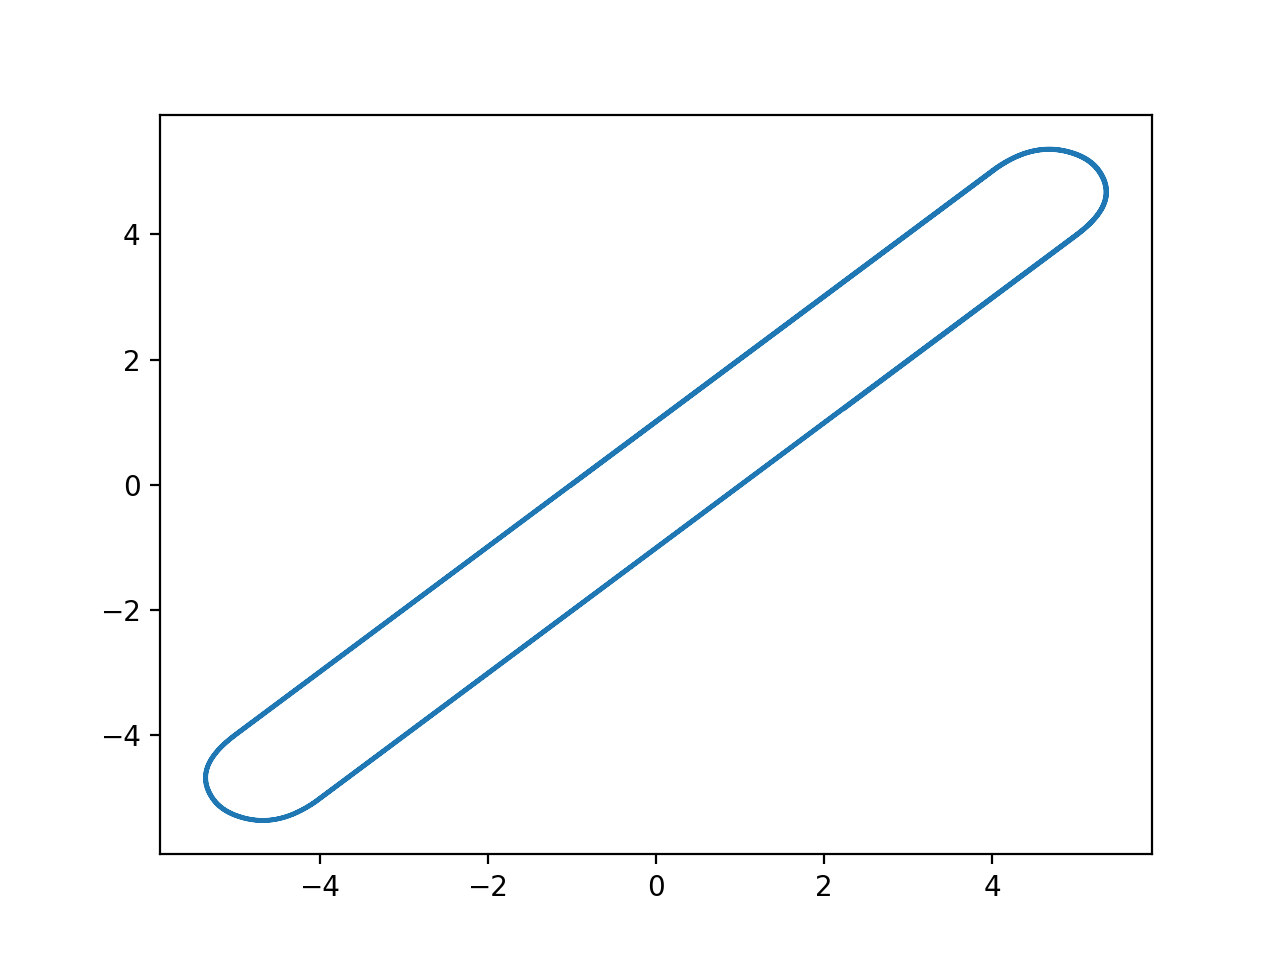

In [4]:
# testing 
# input 2D
p_0 = np.array([[-1., 0.]])
v_0 = np.array([[1., 1.]])
#p_max = np.array([[5., 5.]])
#p_min = np.array([[-5., -5.]])
#p_max = 5.
box = (5., -5.)
m = np.array([[1., 1.]])
# input 3D
#p_max = np.array([[2., 3., 2.], [2., 3., 2.]])
#p_0 = np.array([[1., 0., 0.], [0., 1., 0.]])
#v_0 = np.array([[0., 0., 0.], [0., 0., 0.]])
#m = np.array([[1., 1., 1.], [1., 1., 1.]])

# result
res = eulerclose(potential_gradient, p_0, v_0, m, 100, 1/1000, box)
res
#print(a[0][:,0,0])
plt.plot(res[0][:,0, 0], res[0][:,0,1])
#plt.xlim(-5, 5)
#plt.ylim(-5,2)

# potential
#pot = potential_gradient(p_0)
#plt.plot(res[2][:, 0, 1], res[0][:,0, 1])

<IPython.core.display.Javascript object>


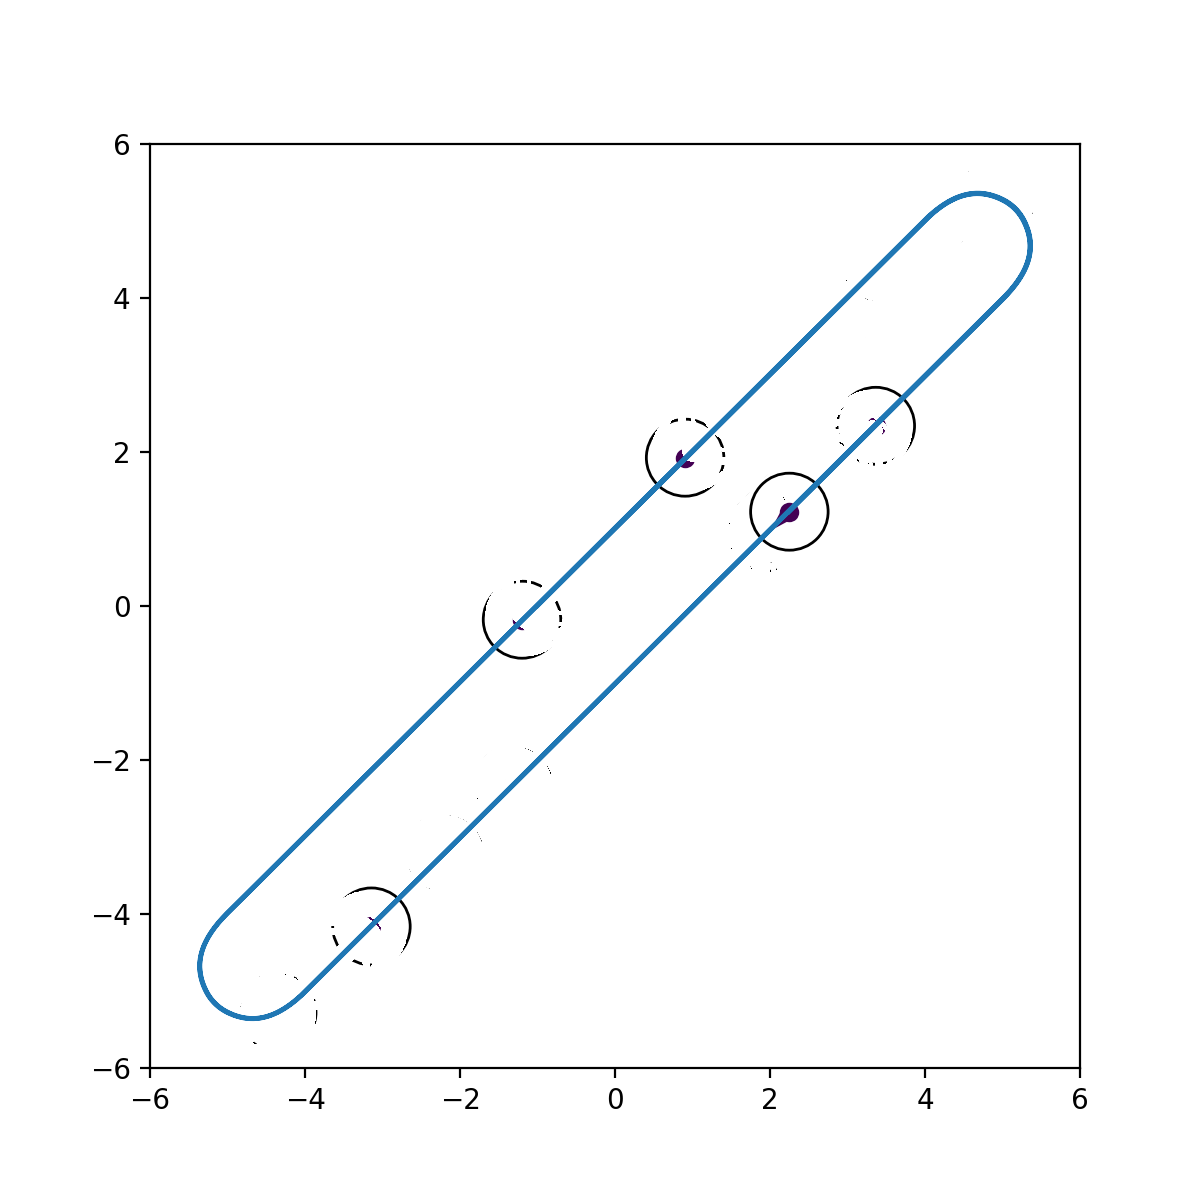

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))
r_init = res[0][0]
r_matrix = res[0]
v_matrix = res[1]
colors = np.arange(len(r_init))
scat = ax.scatter(r_init[:,0], r_init[:,1], c=colors)
circles = [plt.Circle(r, radius=0.5, fill=False) for i,r in enumerate(r_init)]
for c in circles:
    plt.gca().add_patch(c)
qax = ax.quiver(r_matrix[0,:,0], r_matrix[0,:,1], v_matrix[1,:,0], v_matrix[1,:,1],np.arange(len(r_init)),scale=50, width=0.005)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.plot(res[0][:,:, 0], res[0][:,:,1])
def animate(i):
    index = 4*i
    data = r_matrix[index]
    scat.set_offsets(data)
    for i, c in enumerate(circles):
        c.center = data[i]
    qax.set_UVC(v_matrix[index,:,0],v_matrix[index,:,1])
    qax.set_offsets(data)
    return scat,

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=25, bitrate=1800)
anim = animation.FuncAnimation(fig, animate, interval=1, repeat=False)
#anim.save('LJ_Harmonic_Particles.mp4', writer=writer)